## Predição de Diabetes

O conjunto de dados de previsão de diabetes é uma coleção de dados médicos e demográficos de pacientes, juntamente com seu status de diabetes (positivo ou negativo). Os dados incluem características como idade, sexo, índice de massa corporal (IMC), hipertensão, doença cardíaca, histórico de tabagismo, nível de HbA1c e nível de glicose no sangue. Este conjunto de dados pode ser usado para construir modelos de aprendizado de máquina para prever diabetes em pacientes com base em seu histórico médico e informações demográficas. Isso pode ser útil para profissionais de saúde na identificação de pacientes que podem estar em risco de desenvolver diabetes e no desenvolvimento de planos de tratamento personalizados. Além disso, o conjunto de dados pode ser usado por pesquisadores para explorar as relações entre vários fatores médicos e demográficos e a probabilidade de desenvolver diabetes.

In [121]:
!pip install pandas -q
!pip install matplotlib -q
!pip install seaborn -q
# pip install scikit-learn no terminal


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 


df = pd.read_csv('./diabetes_prediction_dataset.csv')


In [123]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [125]:
df.shape

(100000, 9)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [127]:
df.duplicated().sum()


np.int64(3854)

In [128]:
df.drop_duplicates(inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [130]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


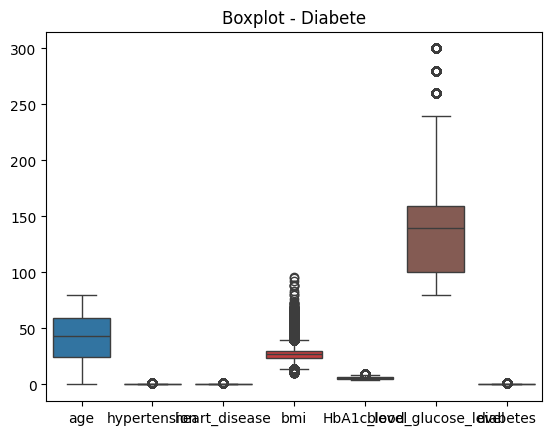

In [131]:
sns.boxplot(data=df)
plt.title('Boxplot - Diabete')
plt.show()

In [132]:
df.columns = df.columns.str.lower()

In [133]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [134]:
df.select_dtypes(include='object')

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current
...,...,...
99994,Female,No Info
99996,Female,No Info
99997,Male,former
99998,Female,never


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   hba1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [136]:
legendas = {}

for col in ['gender','smoking_history']:
    enconder = LabelEncoder()
    
    dados_originais = df[col].copy()
    
    df[col] = enconder.fit_transform(dados_originais)
    
    legendas_col = dict(zip(enconder.classes_, enconder.transform(enconder.classes_)))
    legendas[col] = legendas_col

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   hba1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


In [138]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,2.231159,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.879963,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,4.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


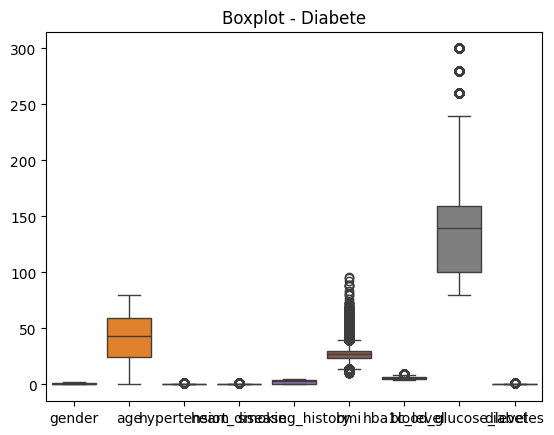

In [139]:
sns.boxplot(data=df)
plt.title('Boxplot - Diabete')
plt.show()

In [140]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [141]:
model_cols = ['gender','age','hypertension','heart_disease','smoking_history','bmi','hba1c_level','blood_glucose_level']

scaler = StandardScaler()
scaler.fit(df_train[model_cols])

df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

df_train_scaled[model_cols] = scaler.transform(df_train[model_cols])
df_test_scaled[model_cols] = scaler.transform(df_test[model_cols]) 

In [142]:
X_train = df_train_scaled[model_cols]
y_train = df_train_scaled['diabetes']

X_test = df_test_scaled[model_cols]
y_test = df_test_scaled['diabetes']

In [143]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier(random_state=42)

In [144]:
print("\n--- Avaliação do Modelo de Árvore de Decisão ---")
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


--- Avaliação do Modelo de Árvore de Decisão ---
Acurácia do modelo: 0.9504

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     26316
           1       0.70      0.75      0.73      2528

    accuracy                           0.95     28844
   macro avg       0.84      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844

